In [1]:
import matplotlib.pylab as plt
import numpy as np

# from scipy import misc
# raster = misc.imread('HillslopeOnlyVeg.tif')

In [7]:
%matplotlib inline

In [27]:
TI = np.ones((20, 20))
TI[:, ::2]  = 0


In [33]:

Ns = 238
rot = np.ones((Ns, Ns))
rot[:, 120:] = 90
rot[:, :120] = 0.

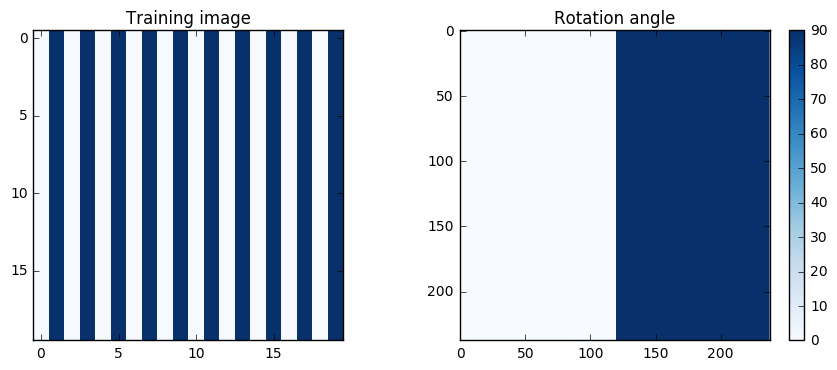

In [34]:
plt.figure(figsize = (11, 4))
plt.subplot(121)
plt.imshow(TI,
           cmap='Blues', interpolation='none')
plt.title('Training image')

plt.subplot(122)
plt.imshow(rot,  cmap='Blues', interpolation='none')
plt.colorbar()
plt.title('Rotation angle')


In [35]:
Nx = TI.shape[1]
Ny = TI.shape[0]

In [45]:
f = open("ti.gslib", "w")
f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(Nx, Ny))
f.write('1\n')
f.write('stripes\n')
count = 0

for j in range(Ny):
    for i in range(Nx):
        f.write('{}\n'.format(str(TI[j,i])))
        count+= 1

In [46]:
f = open("rot.gslib", "w")
f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(rot.shape[0], rot.shape[1]))
f.write('1\n')
f.write('stripes \n')
count = 0

for j in range(rot.shape[0]):
    for i in range(rot.shape[1]):
        f.write('{}\n'.format(str(rot[j,i])))
        count += 1
        

In [42]:
def openfile(fname):
    f =  open(fname, 'r')

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]

    Nx = int(a[0])
    Ny = int(a[1])
    Nz = int(a[2])

    Sx = float(a[3])
    Sy = float(a[4])
    Sz = float(a[5])

    Ox = float(a[6])
    Oy = float(a[7])
    Oz = float(a[8])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    nvar = int(a[0])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    name_of_variable_1 = (a[0])
    print name_of_variable_1,
    
    facies = np.zeros([Nx, Ny])
    for i in range(Ny):
        for j in range(Nx):
            facies[i, j] = int(f.next().split()[0])
            
    return facies, Nx, Ny

veg_real00000 veg_real00000

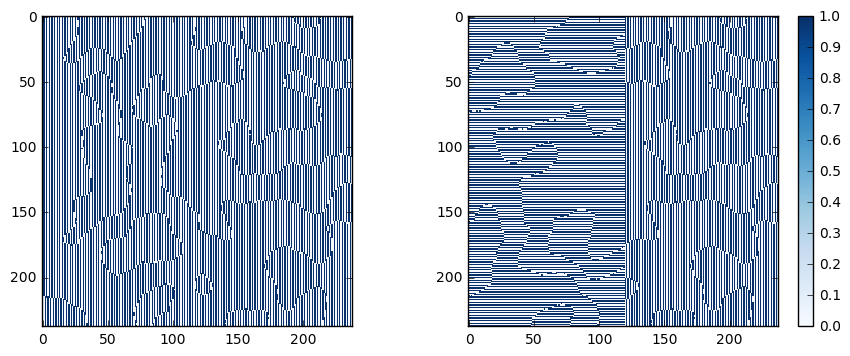

In [43]:
rot_test_small, nx,ny = openfile("rotated/test_real00000.gslib")
test_small, nx,ny = openfile("output/test_real00000.gslib")


fig = plt.figure(figsize = (11, 4))
plt.subplot(121)

# plt.imshow(TI[31:-31, 31:-31], cmap = 'Blues', interpolation  = 'none')
plt.imshow(test_small, cmap = 'Blues', interpolation  = 'none')

plt.subplot(122)
plt.imshow(rot_test_small,  cmap = 'Blues',  interpolation = 'none')
plt.colorbar()


veg_real00000 veg_real00000

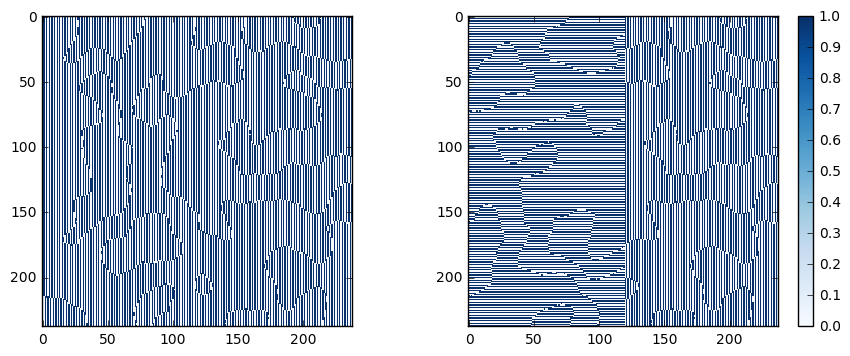

In [44]:
rot_test, nx,ny = openfile("rotated/test_real00000.gslib")
test, nx,ny = openfile("output/test_real00000.gslib")

fig = plt.figure(figsize = (11, 4))
plt.subplot(121)

# plt.imshow(TI[31:-31, 31:-31], cmap = 'Blues', interpolation  = 'none')
plt.imshow(test, cmap = 'Blues', interpolation  = 'none')

plt.subplot(122)
plt.imshow(rot_test,  cmap = 'Blues',  interpolation = 'none')
plt.colorbar()
